# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['FB', 'AMZN', 'NFLX', 'GOOG']
symbols = ['SPY', 'QQQ', 'TLT', 'GLD']
#symbols = ['SPY']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
period = 7

use_cache = False
use_regime_filter = True
use_vola_weight = True

Run Strategy

In [4]:
s = strategy.Strategy(symbols, capital, start, end, stop_loss_pct=85, margin=3, period=period,
                      use_cache=use_cache, use_regime_filter=use_regime_filter,
                      use_vola_weight=use_vola_weight)
s.run()

STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!


Retrieve log DataFrames

In [5]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,57.05,159,entry,LONG,TLT
1,2005-09-14,1,89.96,85,entry,LONG,SPY
2,2005-09-14,2,34.43,219,entry,LONG,QQQ
3,2005-09-29,3,89.94,85,exit,LONG,SPY
4,2005-09-29,4,34.45,219,exit,LONG,QQQ


In [7]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
593,2021-01-29,314.16,2021-02-04,329.82,15.66,3257.33,208,116637.54,LONG,QQQ
594,2021-02-18,332.05,2021-03-11,317.64,-14.41,-3112.95,216,113524.59,LONG,QQQ
595,2021-02-19,388.76,2021-03-10,388.31,-0.45,-100.47,224,113424.12,LONG,SPY
596,2021-03-19,389.48,2021-03-26,395.98,6.50,1651.00,254,115075.12,LONG,SPY
597,2021-03-25,311.33,2021-03-26,316.00,4.67,840.60,180,115915.72,LONG,QQQ


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-03-22,124214.06,124214.06,124214.06,254,24496.20,1.00,-
2021-03-23,123429.20,123429.20,123429.20,254,24496.20,1.00,-
2021-03-24,122926.27,122926.27,122926.27,254,24496.20,1.00,-
2021-03-25,123480.00,123480.00,123480.00,434,-31543.20,1.26,O
2021-03-26,125915.72,125915.72,125915.72,0,125915.72,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   2005-09-02
end                                                     2021-03-26
beginning_balance                                            10000
ending_balance                                           125915.72
total_net_profit                                         115915.72
gross_profit                                             220445.29
gross_loss                                              -104529.56
profit_factor                                                 2.11
return_on_initial_capital                                  1159.16
annual_return_rate                                           17.68
trading_period                           15 years 6 months 24 days
pct_time_in_market                                           69.98
margin                                                           3
avg_leverage                                                  1.30
max_leverage                                                  

,cumul_total,weight,pct_cumul_total,relative_performance
SPY,"$32,387.07",0.25,0.28,1.12
QQQ,"$39,526.61",0.25,0.34,1.36
TLT,"$22,397.85",0.25,0.19,0.77
GLD,"$21,604.18",0.25,0.19,0.75
TOTAL,"$115,915.72",1.00,1.00,1.00


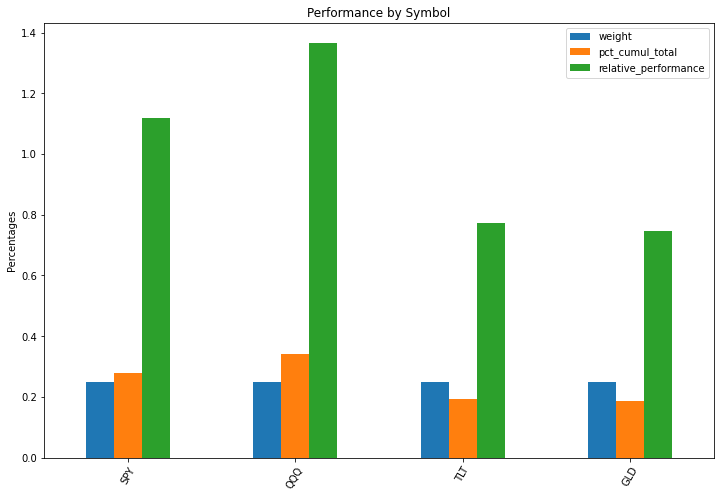

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,SPY,QQQ,TLT,GLD
SPY,1.00,0.92,-0.42,0.04
QQQ,0.92,1.00,-0.38,0.03
TLT,-0.42,-0.38,1.00,0.14
GLD,0.04,0.03,0.14,1.00


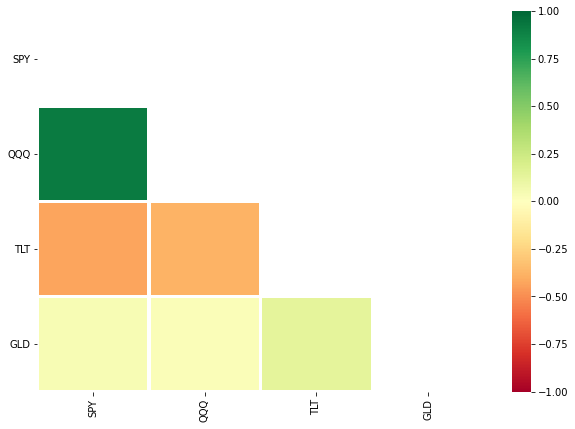

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

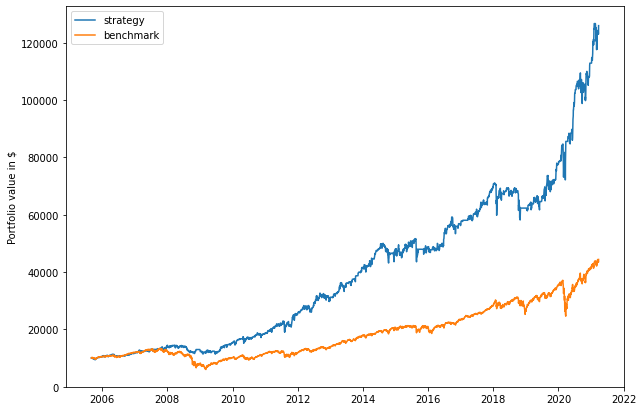

In [13]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,17.68,10.04
max_closed_out_drawdown,-21.67,-55.18
annualized_return_over_max_drawdown,0.82,0.18
best_month,20.96,23.61
worst_month,-15.47,-30.99
sharpe_ratio,0.99,0.58
sortino_ratio,1.11,0.69
monthly_std,3.86,4.64
annual_std,15.92,16.03


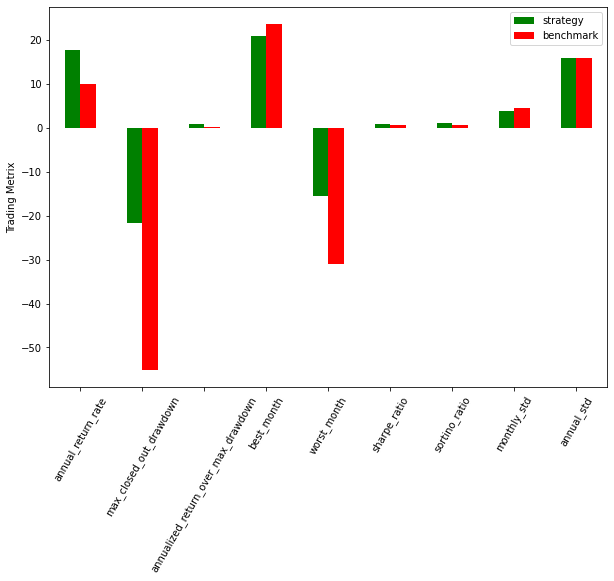

In [14]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterian(stats, benchmark.stats)
kelly

sharpe_ratio            0.99
sharpe_ratio_max        1.05
sharpe_ratio_min        0.93
strategy risk           0.16
instrument risk         0.16
optimal target risk     0.99
half kelly criterian    0.49
aggressive leverage     6.17
moderate leverage       3.09
conservative leverage   2.90
dtype: float64